In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# IMPORT DATA

In [ ]:
df = pd.read_excel('Data/obesitas smote.xlsx')

In [38]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [39]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.357078,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,23.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [40]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

In [41]:
for column in categorical_features:
    if column != 'Age': 
        print(df[column].value_counts())
        print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



# TRANSFORM KATEGORIK KE NUMERIK

In [42]:
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [43]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [44]:
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

In [45]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# SPLIT DATA

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [48]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# MODEL NN

In [49]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(16,)),
        Dense(32, activation='selu', name='L1'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(32, activation='selu', name='L2'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(7, activation='softmax', name='L3')
    ], name="my_model"
)


In [50]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,087 (8.15 KB)

 Trainable params: 1,959 (7.65 KB)

 Non-trainable params: 128 (512.00 B)

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100


169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2997 - loss: 2.0460 - val_accuracy: 0.6036 - val_loss: 1.1032
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5277 - loss: 1.2733 - val_accuracy: 0.6775 - val_loss: 0.9294
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 1.0779 - val_accuracy: 0.7101 - val_loss: 0.8510
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6004 - loss: 1.0278 - val_accuracy: 0.7219 - val_loss: 0.7858
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.9594 - val_accuracy: 0.7219 - val_loss: 0.7425
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.9152 - val_accuracy: 0.7278 - val_loss: 0.7116
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6388 - loss: 0.8871 - val_accuracy: 0.7485 - val_loss: 0.6773
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.8730 - val_accuracy: 0.7396

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi Model: {accuracy*100:.2f}%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 0.3689 
Akurasi Model: 87.23%


In [54]:
import matplotlib.pyplot as plt

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


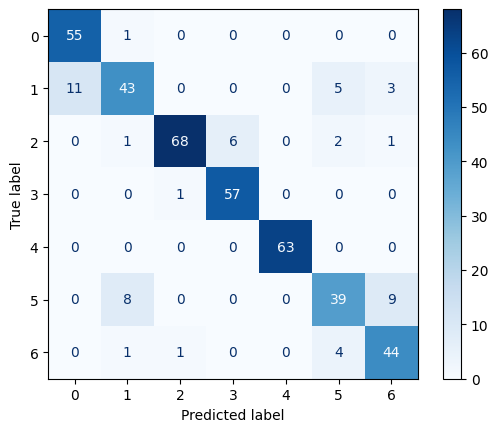

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  


y_test_class = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_test_class, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

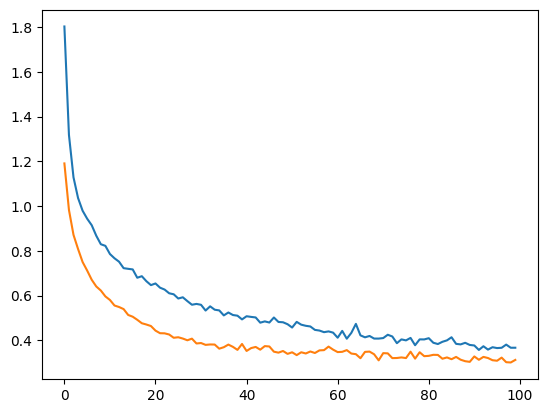

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

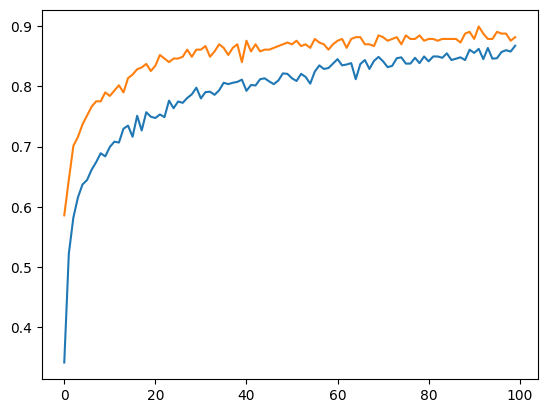

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# CEK CV MEAN SCORE

In [ ]:
from scikeras.wrappers import KerasClassifier
def create_model():
    model = Sequential([
        tf.keras.Input(shape=(16,)),
        Dense(32, activation='selu', name='L1'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(32, activation='selu', name='L2'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(7, activation='softmax', name='L3')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')


print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which

Mean Accuracy: 0.7141
Standard Deviation: 0.0946


# CEK PRESISI, RECALL, F1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracies = []
precisions = []
recalls = []
f1_scores = []


def create_model():
    model = Sequential(
        [
            tf.keras.Input(shape=(16,)),
            Dense(32, activation='selu', name='L1'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(32, activation='selu', name='L2'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(7, activation='softmax', name='L3')
        ], name="my_model"
    )
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

for train_index, val_index in kf.split(X, y):  
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    
    y_train_one_hot = to_categorical(y_train, num_classes=7)
    y_val_one_hot = to_categorical(y_val, num_classes=7)

    
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  

    
    y_pred = model.predict(X_val)
    y_pred_class = np.argmax(y_pred, axis=1)

    
    accuracy = accuracy_score(y_val, y_pred_class)
    precision = precision_score(y_val, y_pred_class, average='weighted')
    recall = recall_score(y_val, y_pred_class, average='weighted')
    f1 = f1_score(y_val, y_pred_class, average='weighted')

    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)


print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Accuracy: 0.7863
Mean Precision: 0.7852
Mean Recall: 0.7863
Mean F1 Score: 0.7801
